In [149]:
pip install pandas-profiling

  Obtaining dependency information for visions[type_image_path]==0.7.4 from https://files.pythonhosted.org/packages/66/00/166b2beb8046f06b77a2bf2c1dafeb52eff608f7dd420c767d5f3ce36ef5/visions-0.7.4-py3-none-any.whl.metadata
  Using cached visions-0.7.4-py3-none-any.whl.metadata (5.9 kB)
Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.6
    Uninstalling visions-0.7.6:
      Successfully uninstalled visions-0.7.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.8.3 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("smartwatches.csv")

In [4]:
data.head(2)

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   

   Rating  Number OF Ratings                             Model Name  \
0     4.0               65.0  Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                 BSW046   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g

In [5]:
data.shape

(450, 16)

In [6]:
data.drop_duplicates()

Unnamed: 0       Brand  Current Price  Original Price  \
0             0       noise        82990.0         89900.0   
1             1  fire-boltt         3799.0         16999.0   
2             2        boat         1999.0          7990.0   
3             3  fire-boltt         1799.0         19999.0   
4             4       noise         1599.0          4999.0   
..          ...         ...            ...             ...   
445         445  fire-boltt         5999.0          8999.0   
446         446  fire-boltt         3700.0          9999.0   
447         447  fire-boltt         5999.0          8999.0   
448         448  fire-boltt         3200.0          7999.0   
449         449  fire-boltt         3000.0          7999.0   

     Discount Percentage  Rating  Number OF Ratings  \
0               7.686318     4.0               65.0   
1              77.651627     4.3            20788.0   
2              74.981227     3.8            21724.0   
3              91.004550     4.3            13244.0   
4              68.013603     4.1            13901.0   
..                   ...     ...                ...   
445            33.337037     2.5                NaN   
446            62.996300     NaN                NaN   
447            33.337037     2.5                NaN   
448            59.994999     NaN                NaN   
449            62.495312     NaN                NaN   

                                 Model Name Dial Shape Strap Color  \
0     Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN         NaN   
1                                    BSW046        NaN         NaN   
2                                 Wave Call        NaN         NaN   
3                                    BSW053        NaN         NaN   
4    Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
..                                      ...        ...         ...   
445                                  bsw003     Circle        Grey   
446                               beast pro     Square       Black   
447                                  bsw003     Circle        Gold   
448                                  call 2     Square        Blue   
449                                  call 2     Square       Black   

    Strap Material Touchscreen  Battery Life (Days) Bluetooth Display Size  \
0              NaN         NaN                  8.0       Yes          NaN   
1          Silicon         Yes                  3.5       Yes   1.8 inches   
2          Silicon         Yes                  8.0       Yes   1.7 inches   
3          Silicon         Yes                  3.5       Yes   1.8 inches   
4            Other         Yes                  8.0       Yes   1.7 inches   
..             ...         ...                  ...       ...          ...   
445        Silicon         Yes                 22.0       Yes   1.3 inches   
446        Silicon         Yes                  8.0       Yes   0.1 inches   
447        Silicon         Yes                 22.0       Yes   1.3 inches   
448        Silicon         Yes                 22.0       Yes   0.1 inches   
449        Silicon         Yes                 22.0       Yes   0.1 inches   

        Weight  
0    35 - 50 g  
1    50 - 75 g  
2    35 - 50 g  
3        75g +  
4    35 - 50 g  
..         ...  
445        NaN  
446        NaN  
447        NaN  
448        NaN  
449        NaN  

[450 rows x 16 columns]

In [7]:
train_data=data.sample(frac=0.80,random_state=42).reset_index()

In [8]:
test_data=data.drop(train_data.index).reset_index()

In [9]:
test_data.shape,train_data.shape

((90, 17), (360, 17))

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Unnamed: 0           360 non-null    int64  
 2   Brand                360 non-null    object 
 3   Current Price        354 non-null    float64
 4   Original Price       304 non-null    float64
 5   Discount Percentage  304 non-null    float64
 6   Rating               356 non-null    float64
 7   Number OF Ratings    315 non-null    float64
 8   Model Name           330 non-null    object 
 9   Dial Shape           260 non-null    object 
 10  Strap Color          260 non-null    object 
 11  Strap Material       304 non-null    object 
 12  Touchscreen          329 non-null    object 
 13  Battery Life (Days)  330 non-null    float64
 14  Bluetooth            355 non-null    object 
 15  Display Size         333 non-null    obj

In [11]:
train_data.isna().sum()

index                    0
Unnamed: 0               0
Brand                    0
Current Price            6
Original Price          56
Discount Percentage     56
Rating                   4
Number OF Ratings       45
Model Name              30
Dial Shape             100
Strap Color            100
Strap Material          56
Touchscreen             31
Battery Life (Days)     30
Bluetooth                5
Display Size            27
Weight                 149
dtype: int64

In [12]:
numeric_data=[feature for feature in train_data.columns if train_data[feature].dtype != 'object']

In [13]:
continuous_data=[feature for feature in train_data.columns if train_data[feature].dtype != 'float64']

In [14]:
continuous_data

['index',
 'Unnamed: 0',
 'Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth',
 'Display Size',
 'Weight']

In [15]:
numeric_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [16]:
train_data[numeric_data].describe()

index  Unnamed: 0  Current Price  Original Price  \
count  360.000000  360.000000     354.000000      304.000000   
mean   222.702778  222.702778   12514.378531    14415.835526   
std    130.632905  130.632905   16914.978666    15613.457236   
min      0.000000    0.000000    1199.000000     1669.000000   
25%    111.750000  111.750000    2126.000000     5999.000000   
50%    222.500000  222.500000    3999.000000     7994.500000   
75%    336.250000  336.250000   17367.250000    17996.000000   
max    448.000000  448.000000   98990.000000    96390.000000   

       Discount Percentage      Rating  Number OF Ratings  Battery Life (Days)  
count           304.000000  356.000000         315.000000           330.000000  
mean             47.955347    4.027528       10671.815873            14.181970  
std              24.696899    0.556828       27575.956948             7.661878  
min             -79.688436    1.000000           1.000000             0.750000  
25%              33.177427    3.900000          55.000000             8.000000  
50%              53.068408    4.100000         830.000000            17.500000  
75%              66.677780    4.300000        7576.500000            22.000000  
max              91.004550    5.000000      275607.000000            22.000000

In [17]:
train_data[numeric_data].corr()

index  Unnamed: 0  Current Price  Original Price  \
index                1.000000    1.000000      -0.100146       -0.084262   
Unnamed: 0           1.000000    1.000000      -0.100146       -0.084262   
Current Price       -0.100146   -0.100146       1.000000        0.971497   
Original Price      -0.084262   -0.084262       0.971497        1.000000   
Discount Percentage -0.123792   -0.123792      -0.602668       -0.479494   
Rating              -0.247504   -0.247504       0.397179        0.325818   
Number OF Ratings   -0.187509   -0.187509      -0.195773       -0.180650   
Battery Life (Days)  0.371223    0.371223       0.030352       -0.132527   

                     Discount Percentage    Rating  Number OF Ratings  \
index                          -0.123792 -0.247504          -0.187509   
Unnamed: 0                     -0.123792 -0.247504          -0.187509   
Current Price                  -0.602668  0.397179          -0.195773   
Original Price                 -0.479494  0.325818          -0.180650   
Discount Percentage             1.000000 -0.191073           0.235221   
Rating                         -0.191073  1.000000           0.085250   
Number OF Ratings               0.235221  0.085250           1.000000   
Battery Life (Days)            -0.011792 -0.102289           0.009617   

                     Battery Life (Days)  
index                           0.371223  
Unnamed: 0                      0.371223  
Current Price                   0.030352  
Original Price                 -0.132527  
Discount Percentage            -0.011792  
Rating                         -0.102289  
Number OF Ratings               0.009617  
Battery Life (Days)             1.000000

In [18]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [19]:
import ydata_profiling as pp

In [20]:
pp.ProfileReport(train_data[numeric_data])

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data visulization

1-Univariate plot

Histogram
,Density plot
,Box and whisker plot

2-Bivairiate plot

CORRELATION plot 

Scatter plot

In [21]:
%matplotlib inline

In [22]:
numeric_data

['index',
 'Unnamed: 0',
 'Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

In [23]:
numeric_data.remove('index')
numeric_data.remove('Unnamed: 0')


In [24]:
numeric_data

['Current Price',
 'Original Price',
 'Discount Percentage',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)']

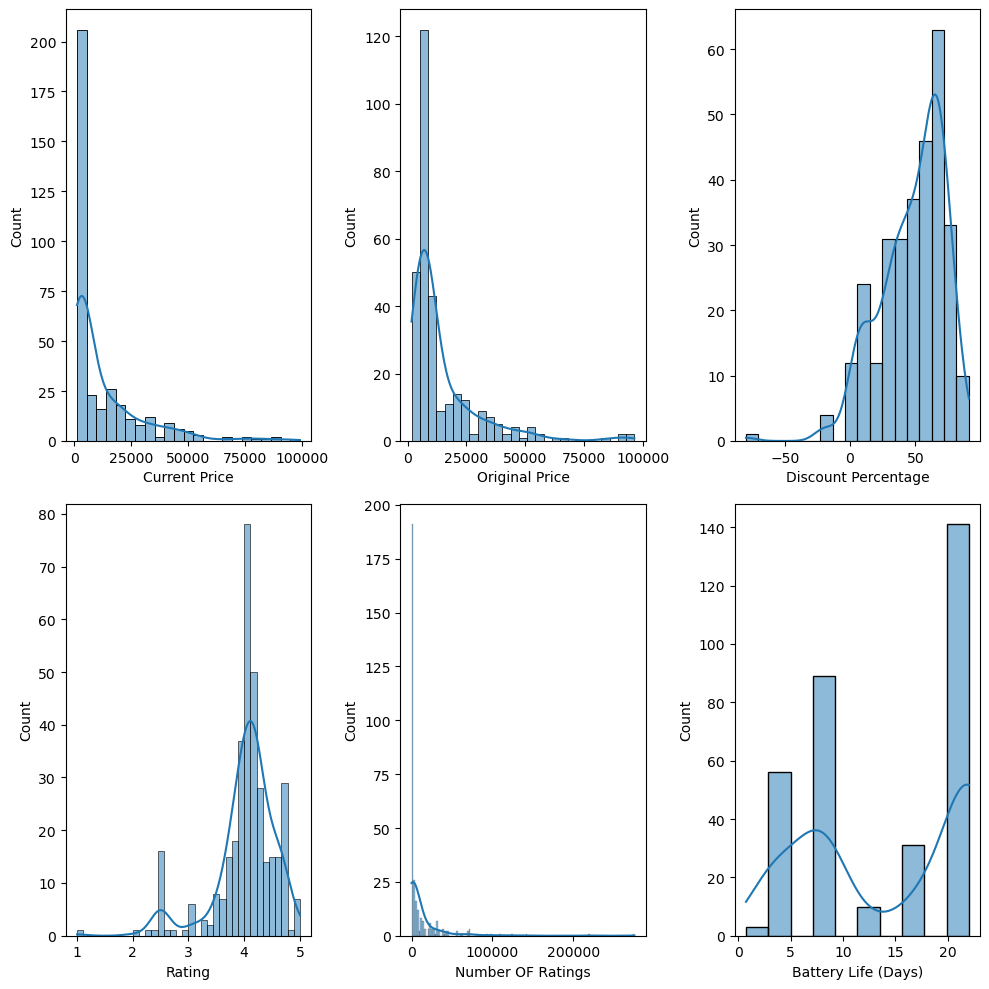

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Plot each histogram in its respective subplot
sns.histplot(data=train_data['Current Price'], kde=True, ax=axes[0, 0])
sns.histplot(data=train_data['Original Price'], kde=True, ax=axes[0, 1])
sns.histplot(data=train_data['Discount Percentage'], kde=True, ax=axes[0, 2])
sns.histplot(data=train_data['Rating'], kde=True, ax=axes[1, 0])
sns.histplot(data=train_data['Number OF Ratings'], kde=True, ax=axes[1, 1])
sns.histplot(data=train_data['Battery Life (Days)'], kde=True, ax=axes[1, 2])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

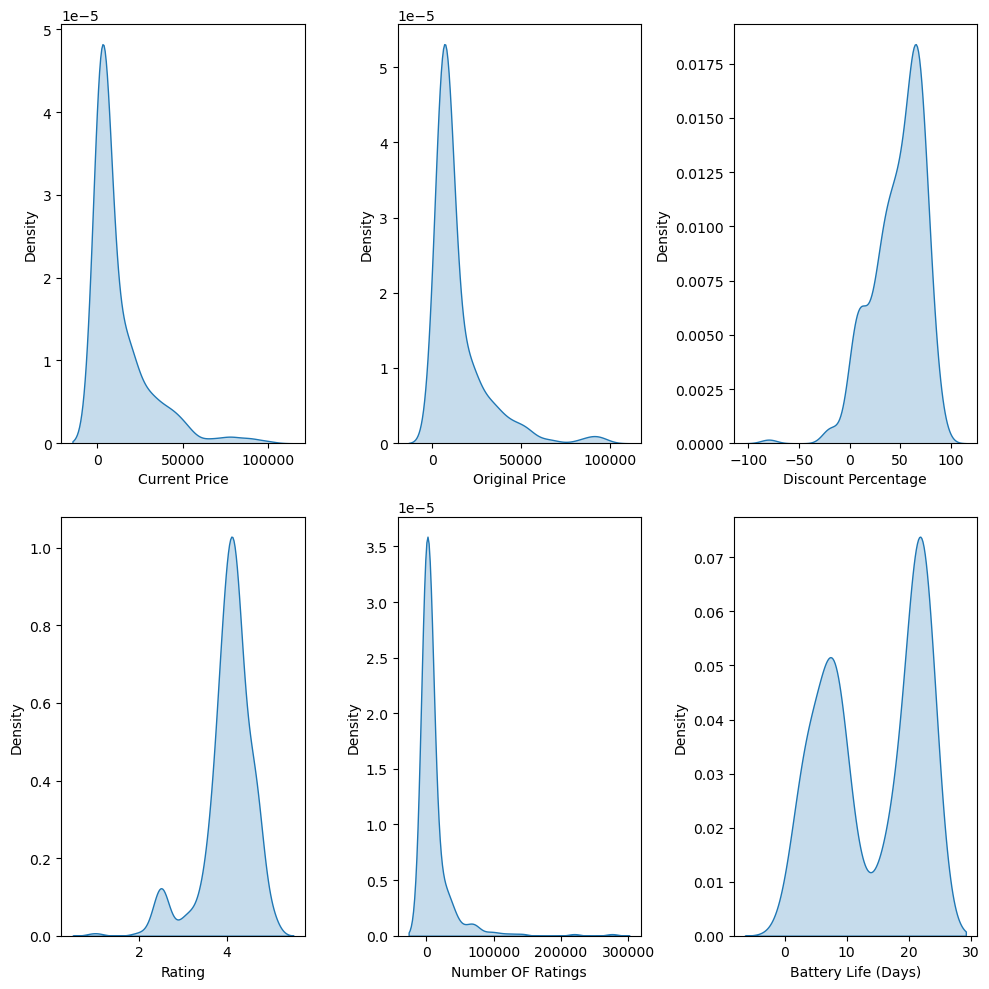

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Plot each density plot in its respective subplot
sns.kdeplot(data=train_data['Current Price'], ax=axes[0, 0],fill=True)
sns.kdeplot(data=train_data['Original Price'], ax=axes[0, 1],fill=True)
sns.kdeplot(data=train_data['Discount Percentage'], ax=axes[0, 2],fill=True)
sns.kdeplot(data=train_data['Rating'], ax=axes[1, 0],fill=True)
sns.kdeplot(data=train_data['Number OF Ratings'], ax=axes[1, 1],fill=True)
sns.kdeplot(data=train_data['Battery Life (Days)'], ax=axes[1, 2],fill=True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


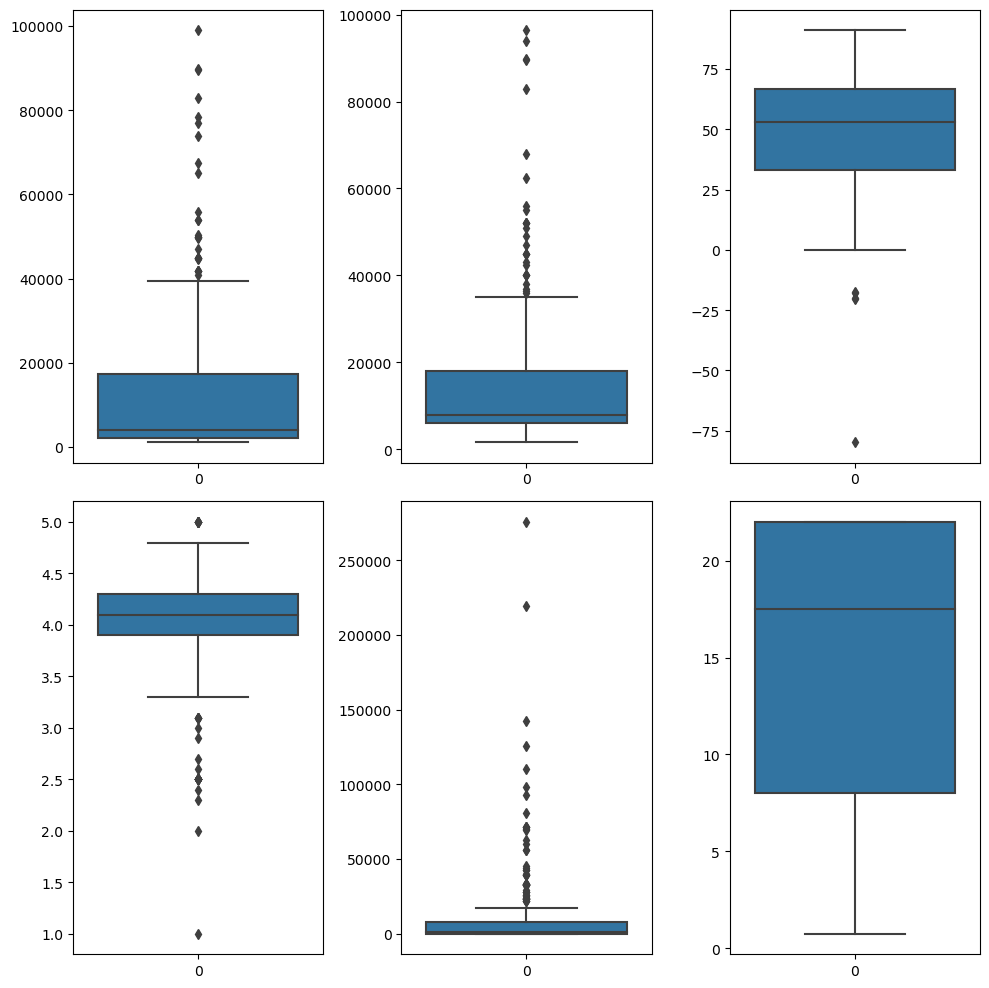

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Plot each histogram in its respective subplot
sns.boxplot(data=train_data['Current Price'],  ax=axes[0, 0])
sns.boxplot(data=train_data['Original Price'], ax=axes[0, 1])
sns.boxplot(data=train_data['Discount Percentage'],  ax=axes[0, 2])
sns.boxplot(data=train_data['Rating'],  ax=axes[1, 0])
sns.boxplot(data=train_data['Number OF Ratings'],  ax=axes[1, 1])
sns.boxplot(data=train_data['Battery Life (Days)'],  ax=axes[1, 2])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

C:\Users\Sagar\anaconda3\file\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


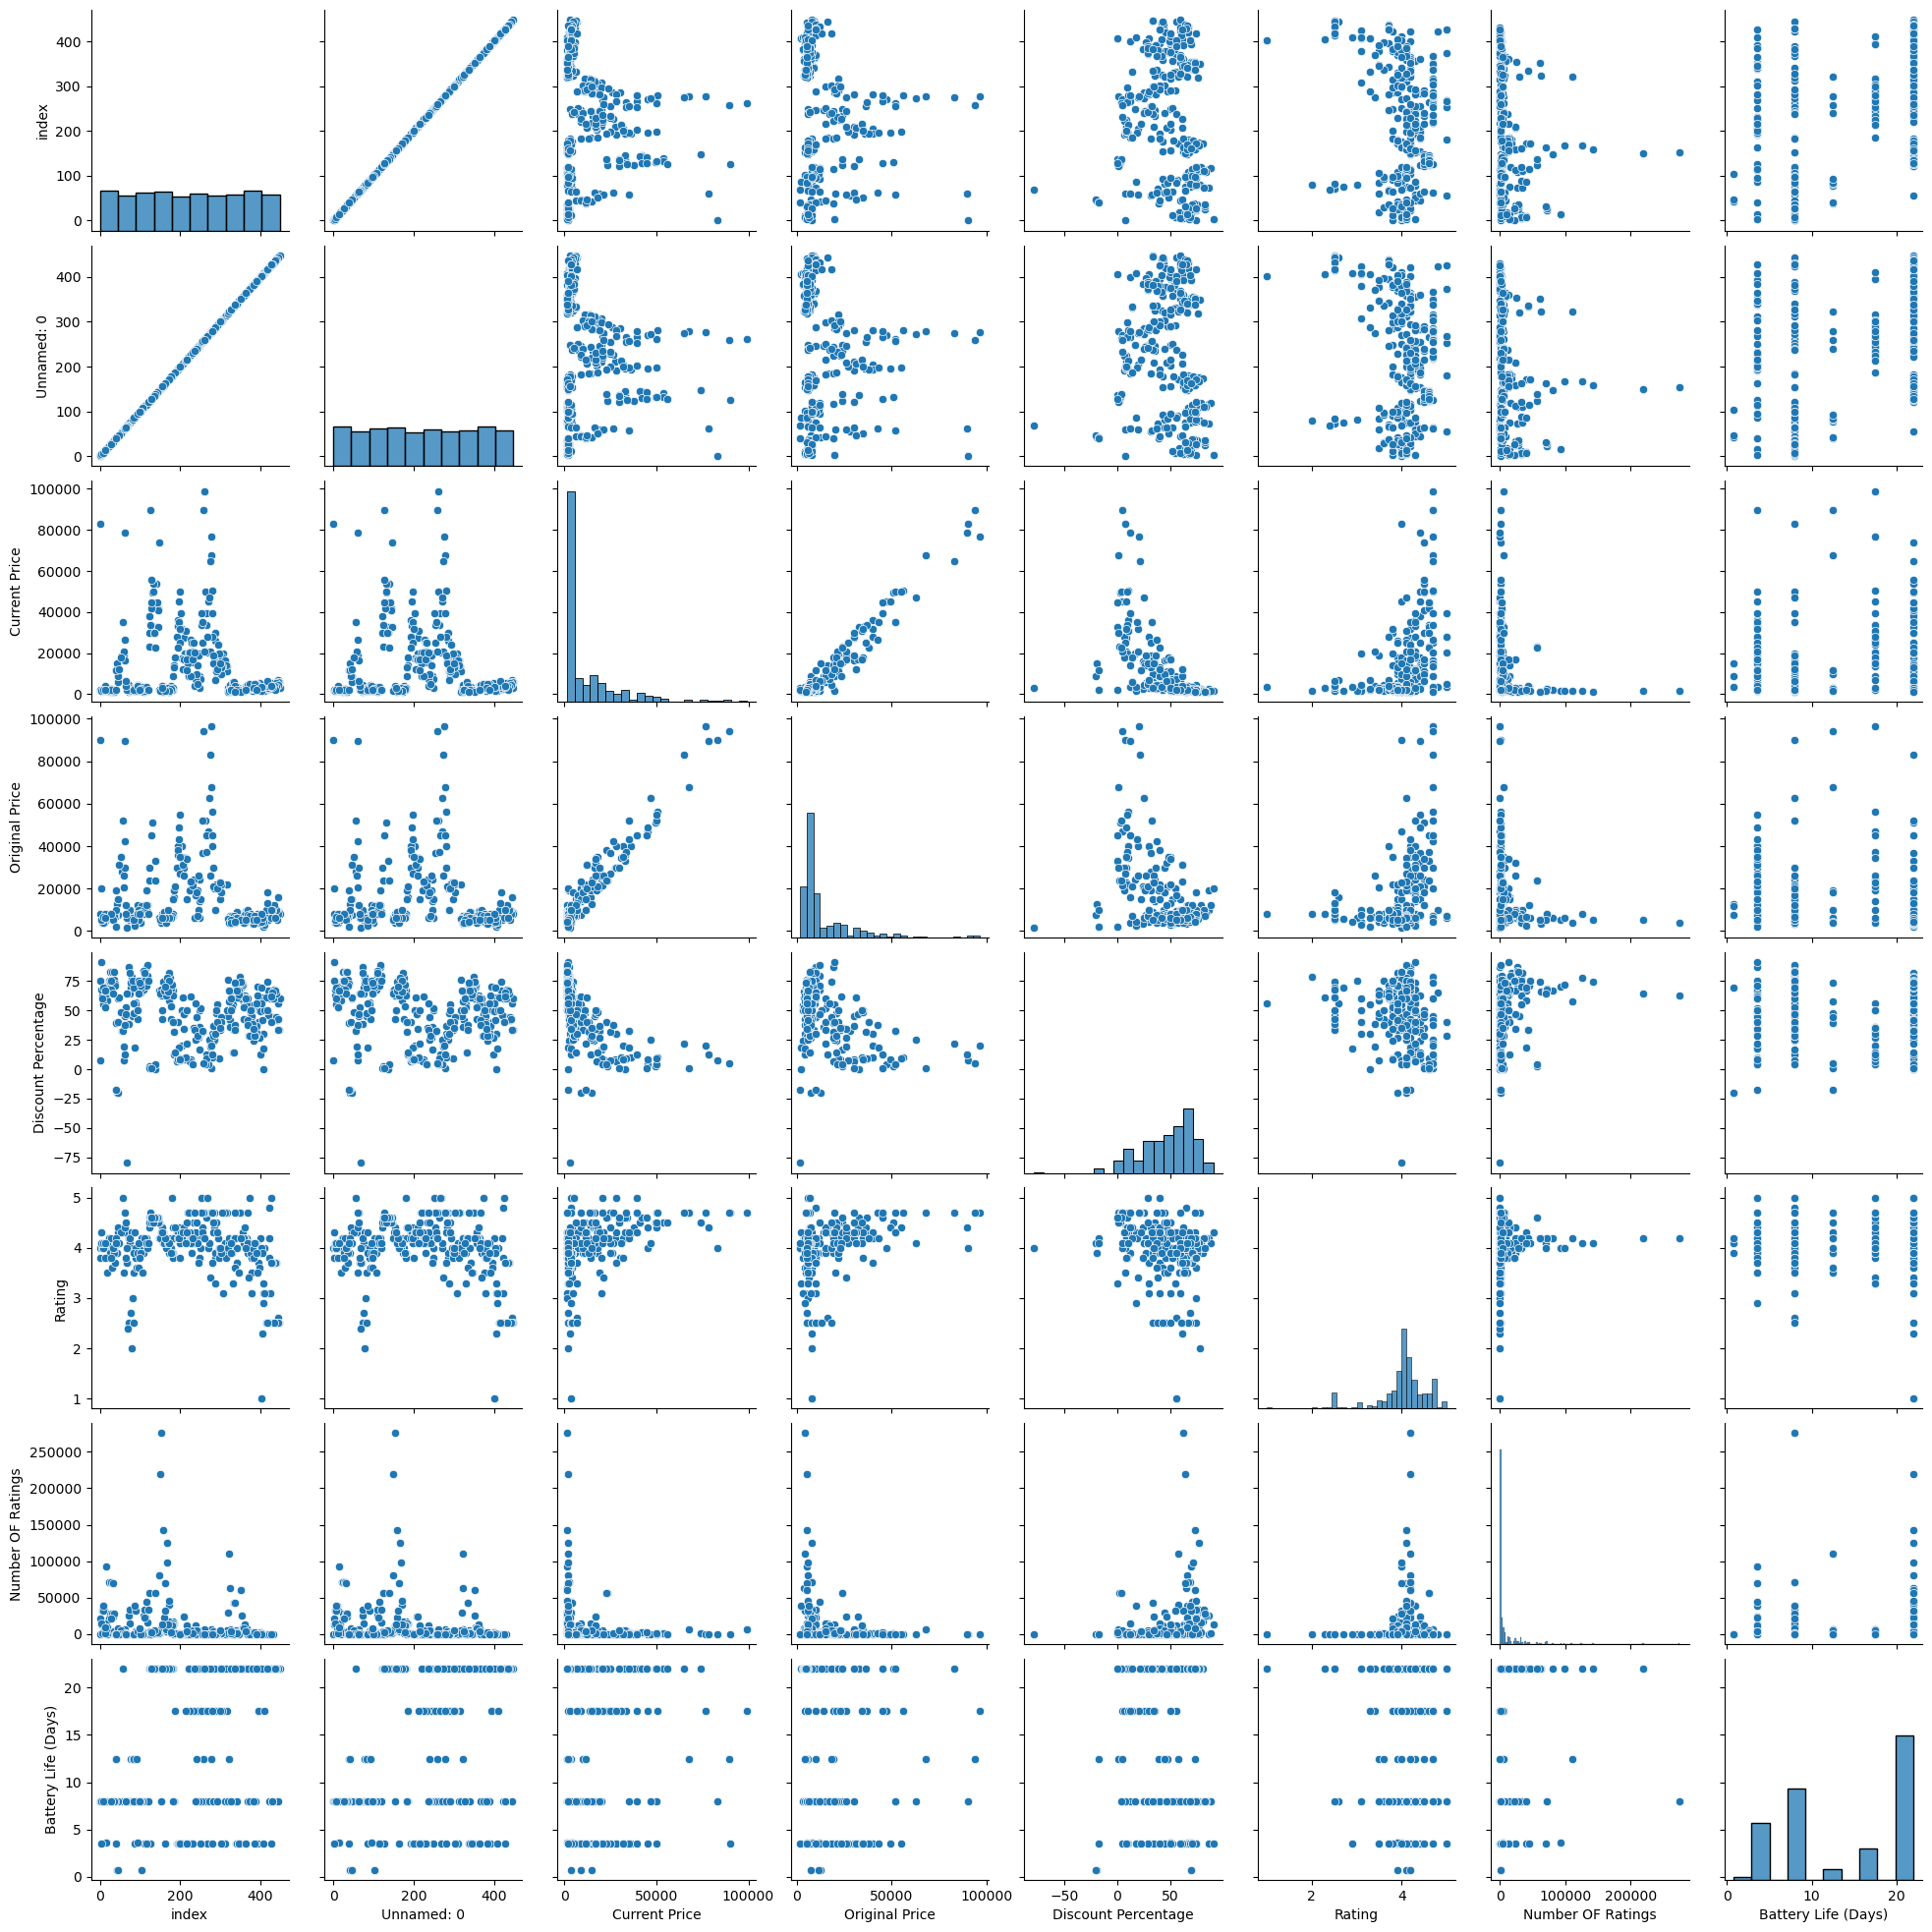

In [176]:
sns.pairplot(train_data)

<Axes: >

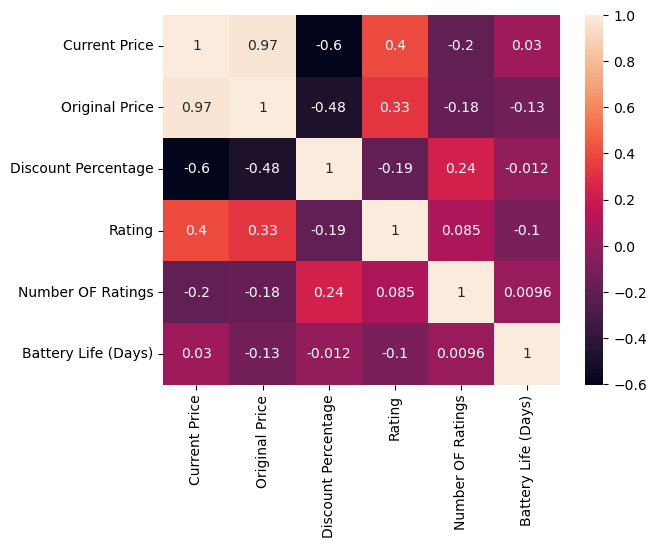

In [177]:
df=train_data[numeric_data].corr()
sns.heatmap(df,annot=True)

FEATURE ENGERNINIG

In [178]:
df=data.copy()

In [179]:
df.drop_duplicates(inplace=True)

In [180]:
train_df=df.copy()

In [181]:
train_df.head()

Unnamed: 0       Brand  Current Price  Original Price  Discount Percentage  \
0           0       noise        82990.0         89900.0             7.686318   
1           1  fire-boltt         3799.0         16999.0            77.651627   
2           2        boat         1999.0          7990.0            74.981227   
3           3  fire-boltt         1799.0         19999.0            91.004550   
4           4       noise         1599.0          4999.0            68.013603   

   Rating  Number OF Ratings                              Model Name  \
0     4.0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk   
1     4.3            20788.0                                  BSW046   
2     3.8            21724.0                               Wave Call   
3     4.3            13244.0                                  BSW053   
4     4.1            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk   

  Dial Shape Strap Color Strap Material Touchscreen  Battery Life (Days)  \
0        NaN         NaN            NaN         NaN                  8.0   
1        NaN         NaN        Silicon         Yes                  3.5   
2        NaN         NaN        Silicon         Yes                  8.0   
3        NaN         NaN        Silicon         Yes                  3.5   
4        NaN         NaN          Other         Yes                  8.0   

  Bluetooth Display Size     Weight  
0       Yes          NaN  35 - 50 g  
1       Yes   1.8 inches  50 - 75 g  
2       Yes   1.7 inches  35 - 50 g  
3       Yes   1.8 inches      75g +  
4       Yes   1.7 inches  35 - 50 g

In [182]:
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [183]:
train_df.head(2)

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   

   Number OF Ratings                             Model Name Dial Shape  \
0               65.0  Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                 BSW046        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   

  Display Size     Weight  
0          NaN  35 - 50 g  
1   1.8 inches  50 - 75 g

In [184]:
train_df['Display Size'].isna().sum()

30

In [185]:
train_df['Display Size'].value_counts().count()

40

In [186]:
train_df['Display Size'].fillna('0.0 inches',inplace=True)

In [187]:
train_df['Display Size'].isna().sum()

0

In [188]:
train_df['Display Size']=train_df['Display Size'].apply(lambda x : float(x.split()[0]))

In [189]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [190]:
train_df['Display Size'].replace(0.0,np.nan,inplace=True)

In [191]:
train_df['Display Size'].isna().sum()

31

In [192]:
train_df['Weight'].isna().sum()

186

In [193]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [194]:
import re

In [195]:
re.findall('\d+', '20 - 35 g ')

['20', '35']

In [196]:
cel=sum(int(x)  for x in re.findall('\d+', '20 - 35 g '))/2

In [197]:
train_df['Weight'].replace('20 - 35 g',cel,inplace=True)

In [198]:
train_df['Weight'].value_counts()

Weight
27.5         80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [199]:
cel1=sum(int(x)  for x in re.findall('\d+', '35 - 50 g'))/2
train_df['Weight'].replace('35 - 50 g',cel1,inplace=True)
cel2=sum(int(x)  for x in re.findall('\d+', '50 - 75 g'))/2
train_df['Weight'].replace('50 - 75 g',cel2,inplace=True)


In [200]:
train_df['Weight'].value_counts()

Weight
27.5       80
75g +      66
42.5       58
<= 20 g    43
62.5       17
Name: count, dtype: int64

In [201]:
cel3=float(re.findall('\d+','75g +')[0])

In [202]:
train_df['Weight'].replace('75g +',cel3,inplace=True)

In [203]:
cel4=float(re.findall('\d+','<= 20 g')[0])


In [204]:
train_df['Weight'].replace('<= 20 g',cel4,inplace=True)

In [205]:
train_df['Weight'].value_counts()

Weight
27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: count, dtype: int64

In [206]:
train_df.head()

Brand  Current Price  Original Price  Discount Percentage  Rating  \
0       noise        82990.0         89900.0             7.686318     4.0   
1  fire-boltt         3799.0         16999.0            77.651627     4.3   
2        boat         1999.0          7990.0            74.981227     3.8   
3  fire-boltt         1799.0         19999.0            91.004550     4.3   
4       noise         1599.0          4999.0            68.013603     4.1   

   Number OF Ratings                              Model Name Dial Shape  \
0               65.0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN   
1            20788.0                                  BSW046        NaN   
2            21724.0                               Wave Call        NaN   
3            13244.0                                  BSW053        NaN   
4            13901.0  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   

  Strap Color Strap Material Touchscreen  Battery Life (Days) Bluetooth  \
0         NaN            NaN         NaN                  8.0       Yes   
1         NaN        Silicon         Yes                  3.5       Yes   
2         NaN        Silicon         Yes                  8.0       Yes   
3         NaN        Silicon         Yes                  3.5       Yes   
4         NaN          Other         Yes                  8.0       Yes   

   Display Size  Weight  
0           NaN    42.5  
1           1.8    62.5  
2           1.7    42.5  
3           1.8    75.0  
4           1.7    42.5

In [207]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [208]:
train_df['discount_price']=train_df['Original Price']*(-train_df['Discount Percentage'])/100

In [209]:
train_df['discount_price']

0      -6910.000000
1     -13200.000001
2      -5991.000000
3     -18200.000000
4      -3400.000000
           ...     
445    -3000.000000
446    -6299.000000
447    -3000.000000
448    -4799.000000
449    -4999.000000
Name: discount_price, Length: 450, dtype: float64

In [210]:
train_df.drop('Discount Percentage',inplace=True,axis=1)

In [211]:
train_df.head()

Brand  Current Price  Original Price  Rating  Number OF Ratings  \
0       noise        82990.0         89900.0     4.0               65.0   
1  fire-boltt         3799.0         16999.0     4.3            20788.0   
2        boat         1999.0          7990.0     3.8            21724.0   
3  fire-boltt         1799.0         19999.0     4.3            13244.0   
4       noise         1599.0          4999.0     4.1            13901.0   

                               Model Name Dial Shape Strap Color  \
0   Wrb-sw-colorfitpro4alpha-std-rgld_pnk        NaN         NaN   
1                                  BSW046        NaN         NaN   
2                               Wave Call        NaN         NaN   
3                                  BSW053        NaN         NaN   
4  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   

  Strap Material Touchscreen  Battery Life (Days) Bluetooth  Display Size  \
0            NaN         NaN                  8.0       Yes           NaN   
1        Silicon         Yes                  3.5       Yes           1.8   
2        Silicon         Yes                  8.0       Yes           1.7   
3        Silicon         Yes                  3.5       Yes           1.8   
4          Other         Yes                  8.0       Yes           1.7   

   Weight  discount_price  
0    42.5    -6910.000000  
1    62.5   -13200.000001  
2    42.5    -5991.000000  
3    75.0   -18200.000000  
4    42.5    -3400.000000

NUMERICAL COLUMN

In [212]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [213]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'discount_price']

In [214]:
train_df[numerical_col].head()

Current Price  Original Price  Rating  Number OF Ratings  \
0        82990.0         89900.0     4.0               65.0   
1         3799.0         16999.0     4.3            20788.0   
2         1999.0          7990.0     3.8            21724.0   
3         1799.0         19999.0     4.3            13244.0   
4         1599.0          4999.0     4.1            13901.0   

   Battery Life (Days)  Display Size  Weight  discount_price  
0                  8.0           NaN    42.5    -6910.000000  
1                  3.5           1.8    62.5   -13200.000001  
2                  8.0           1.7    42.5    -5991.000000  
3                  3.5           1.8    75.0   -18200.000000  
4                  8.0           1.7    42.5    -3400.000000

In [215]:
train_df.shape

(450, 15)

In [216]:
# plot box plot for each numerical column

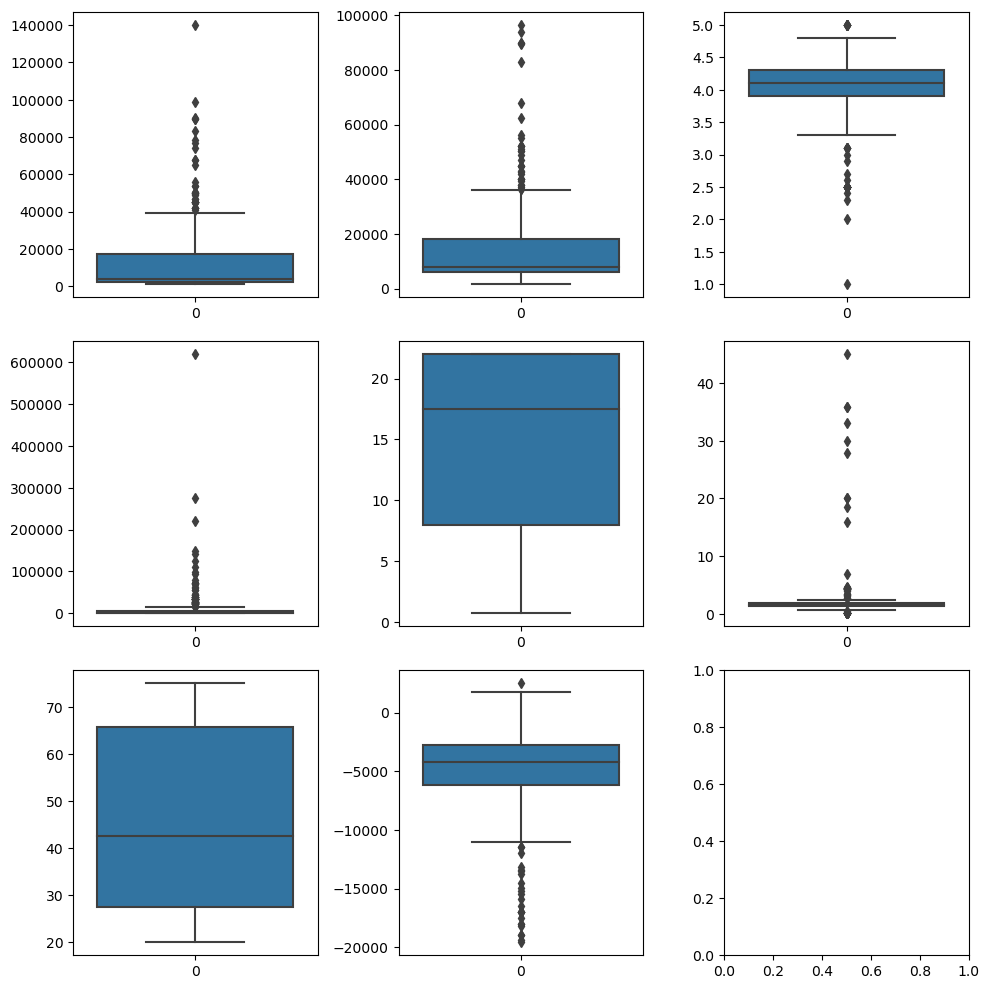

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# Plot each density plot in its respective subplot
sns.boxplot(data=train_df['Current Price'], ax=axes[0, 0])
sns.boxplot(data=train_df['Original Price'], ax=axes[0, 1],)
sns.boxplot(data=train_df['Rating'], ax=axes[0, 2])
sns.boxplot(data=train_df['Number OF Ratings'], ax=axes[1, 0])
sns.boxplot(data=train_df['Battery Life (Days)'], ax=axes[1, 1])
sns.boxplot(data=train_df['Display Size'], ax=axes[1, 2])
sns.boxplot(data=train_df['Weight'], ax=axes[2, 0])
sns.boxplot(data=train_df['discount_price'], ax=axes[2, 1])
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [218]:
# now we have to remove outlier,since distribution of data is skewed so we use IQR method to remove outlier

In [219]:
train_df.columns 

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'discount_price'],
      dtype='object')

In [220]:
train_df.shape

(450, 15)

In [221]:
def remove_outliers_IQR(data,col):
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1-1.5*IQR
    Upper_bound=Q3+1.5*IQR
    return data[(data[col]>Lower_bound) & (data[col] < Upper_bound)]

In [222]:
import_col=['Current Price','Original Price', 'Rating','Number OF Ratings','Battery Life (Days)']

In [223]:
for column in import_col:
    train_df=remove_outliers_IQR(train_df,column)
# now all the outlier are remove

In [224]:
train_df.shape

(217, 15)

In [225]:
for col in numerical_col:
    train_df[col].fillna(train_df[col].median(), inplace=True) # if distribution is skewed then we replace null value by median 
                                                            # when it is normal distribution then we replace with mode 

In [226]:
train_df.shape

(217, 15)

In [227]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              8
Dial Shape             74
Strap Color            74
Strap Material         35
Touchscreen            10
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
discount_price          0
dtype: int64

In [228]:
train_df[numerical_col].head()

Current Price  Original Price  Rating  Number OF Ratings  \
1         3799.0         16999.0     4.3            20788.0   
2         1999.0          7990.0     3.8            21724.0   
3         1799.0         19999.0     4.3            13244.0   
4         1599.0          4999.0     4.1            13901.0   
5         1499.0          3999.0     4.0            32704.0   

   Battery Life (Days)  Display Size  Weight  discount_price  
1                  3.5           1.8    62.5   -13200.000001  
2                  8.0           1.7    42.5    -5991.000000  
3                  3.5           1.8    75.0   -18200.000000  
4                  8.0           1.7    42.5    -3400.000000  
5                  8.0           1.7    42.5    -2500.000000

In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(train_df[numerical_col[:-1]])
data

array([[0.1092437 , 0.56836451, 0.66666667, ..., 0.12941176, 0.08542714,
        0.77272727],
       [0.03361345, 0.22996018, 0.33333333, ..., 0.34117647, 0.08040201,
        0.40909091],
       [0.02521008, 0.68105326, 0.66666667, ..., 0.12941176, 0.08542714,
        1.        ],
       ...,
       [0.11764706, 0.30542409, 0.26666667, ..., 1.        , 0.08040201,
        0.40909091],
       [0.04617647, 0.15517241, 0.2       , ..., 1.        , 0.        ,
        0.40909091],
       [0.11764706, 0.30542409, 0.26666667, ..., 1.        , 0.08040201,
        0.40909091]])

In [230]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [231]:
data

Current Price  Original Price    Rating  Number OF Ratings  \
0         0.109244        0.568365  0.666667           0.622082   
1         0.033613        0.229960  0.333333           0.650096   
2         0.025210        0.681053  0.666667           0.396295   
3         0.016807        0.117609  0.533333           0.415958   
4         0.012605        0.080047  0.466667           0.978720   
..             ...             ...       ...                ...   
212       0.094538        0.305424  0.333333           0.002394   
213       0.096639        0.305424  1.000000           0.000030   
214       0.117647        0.305424  0.266667           0.000000   
215       0.046176        0.155172  0.200000           0.000060   
216       0.117647        0.305424  0.266667           0.000090   

     Battery Life (Days)  Display Size    Weight  
0               0.129412      0.085427  0.772727  
1               0.341176      0.080402  0.409091  
2               0.129412      0.085427  1.000000  
3               0.341176      0.080402  0.409091  
4               0.341176      0.080402  0.409091  
..                   ...           ...       ...  
212             1.000000      0.000000  1.000000  
213             0.341176      0.000000  0.409091  
214             1.000000      0.080402  0.409091  
215             1.000000      0.000000  0.409091  
216             1.000000      0.080402  0.409091  

[217 rows x 7 columns]

In [232]:
data.shape, train_df.shape

((217, 7), (217, 15))

In [233]:
train_df[numerical_col].isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
discount_price         0
dtype: int64

In [234]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)

In [235]:
train_df.head()

Brand                              Model Name Dial Shape Strap Color  \
1  fire-boltt                                  BSW046        NaN         NaN   
2        boat                               Wave Call        NaN         NaN   
3  fire-boltt                                  BSW053        NaN         NaN   
4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
5       noise                                  NSW-05        NaN         NaN   

  Strap Material Touchscreen Bluetooth  discount_price  
1        Silicon         Yes       Yes   -13200.000001  
2        Silicon         Yes       Yes    -5991.000000  
3        Silicon         Yes       Yes   -18200.000000  
4          Other         Yes       Yes    -3400.000000  
5          Other         Yes       Yes    -2500.000000

In [236]:
train_df.isna().sum()

Brand              0
Model Name         8
Dial Shape        74
Strap Color       74
Strap Material    35
Touchscreen       10
Bluetooth          0
discount_price     0
dtype: int64

In [237]:
train_df.shape, data.shape

((217, 8), (217, 7))

In [238]:
train_df = pd.concat([train_df.reset_index(), data], axis=1)

In [239]:
train_df.head()

index       Brand                              Model Name Dial Shape  \
0      1  fire-boltt                                  BSW046        NaN   
1      2        boat                               Wave Call        NaN   
2      3  fire-boltt                                  BSW053        NaN   
3      4       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN   
4      5       noise                                  NSW-05        NaN   

  Strap Color Strap Material Touchscreen Bluetooth  discount_price  \
0         NaN        Silicon         Yes       Yes   -13200.000001   
1         NaN        Silicon         Yes       Yes    -5991.000000   
2         NaN        Silicon         Yes       Yes   -18200.000000   
3         NaN          Other         Yes       Yes    -3400.000000   
4         NaN          Other         Yes       Yes    -2500.000000   

   Current Price  Original Price    Rating  Number OF Ratings  \
0       0.109244        0.568365  0.666667           0.622082   
1       0.033613        0.229960  0.333333           0.650096   
2       0.025210        0.681053  0.666667           0.396295   
3       0.016807        0.117609  0.533333           0.415958   
4       0.012605        0.080047  0.466667           0.978720   

   Battery Life (Days)  Display Size    Weight  
0             0.129412      0.085427  0.772727  
1             0.341176      0.080402  0.409091  
2             0.129412      0.085427  1.000000  
3             0.341176      0.080402  0.409091  
4             0.341176      0.080402  0.409091

In [240]:
train_df[numerical_col].head()

Current Price  Original Price    Rating  Number OF Ratings  \
0       0.109244        0.568365  0.666667           0.622082   
1       0.033613        0.229960  0.333333           0.650096   
2       0.025210        0.681053  0.666667           0.396295   
3       0.016807        0.117609  0.533333           0.415958   
4       0.012605        0.080047  0.466667           0.978720   

   Battery Life (Days)  Display Size    Weight  discount_price  
0             0.129412      0.085427  0.772727   -13200.000001  
1             0.341176      0.080402  0.409091    -5991.000000  
2             0.129412      0.085427  1.000000   -18200.000000  
3             0.341176      0.080402  0.409091    -3400.000000  
4             0.341176      0.080402  0.409091    -2500.000000

Categorical data

In [241]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [242]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [243]:
train_df[categorical_col].head()

Brand                              Model Name Dial Shape Strap Color  \
0  fire-boltt                                  BSW046        NaN         NaN   
1        boat                               Wave Call        NaN         NaN   
2  fire-boltt                                  BSW053        NaN         NaN   
3       noise  Wrb-sw-colorfitpulsegobuzz-std-blk_blk        NaN         NaN   
4       noise                                  NSW-05        NaN         NaN   

  Strap Material Touchscreen Bluetooth  
0        Silicon         Yes       Yes  
1        Silicon         Yes       Yes  
2        Silicon         Yes       Yes  
3          Other         Yes       Yes  
4          Other         Yes       Yes

In [244]:
train_df['Bluetooth'].value_counts()

Bluetooth
Yes    217
Name: count, dtype: int64

In [245]:
categorical_col.remove('Bluetooth')

In [246]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen']

In [247]:
from scipy.stats import f_oneway
    
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['discount_price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ': ', 'P-Value for anova is : ', AnovaResults[1])

Brand :  P-Value for anova is :  2.4462819223762697e-14
Model Name :  P-Value for anova is :  2.4073859094171234e-05
Dial Shape :  P-Value for anova is :  4.648691571172116e-05
Strap Color :  P-Value for anova is :  0.2437680262508593
Strap Material :  P-Value for anova is :  0.0005262473852064196
Touchscreen :  P-Value for anova is :  0.9604617122976038


In [248]:
# since p value of brand,model_name,dial shape,strap material is less then 0.05 so they accept null hypothesis

In [249]:
imp_col=['Brand','Model Name','Dial Shape','Strap Material']

In [250]:
train_df[imp_col].head(2)

Brand Model Name Dial Shape Strap Material
0  fire-boltt     BSW046        NaN        Silicon
1        boat  Wave Call        NaN        Silicon

In [251]:
train_df[imp_col].isna().sum()

Brand              0
Model Name         8
Dial Shape        74
Strap Material    35
dtype: int64

In [252]:
for col in imp_col:
    train_df[col].fillna('others',inplace=True)

In [253]:
train_df[imp_col].isna().sum()

Brand             0
Model Name        0
Dial Shape        0
Strap Material    0
dtype: int64

In [261]:
brand = pd.get_dummies(train_df['Brand'], drop_first=True) # because in brand there is no null value
# and in other column of imp_col null vaklue is filled with others
model_name  = pd.get_dummies(train_df['Model Name']).drop(['others'], axis=1)
dial_shape=pd.get_dummies(train_df['Dial Shape']).drop(['others'],axis=1)
strap_material=pd.get_dummies(train_df['Strap Material']).drop(['others'],axis=1)
                          


In [269]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material], axis=1)

In [271]:
imp_df.head()

ambrane   boat  crossbeats   dizo  fire-boltt  fitbit  fossil  garmin  \
0    False  False       False  False        True   False   False   False   
1    False   True       False  False       False   False   False   False   
2    False  False       False  False        True   False   False   False   
3    False  False       False  False       False   False   False   False   
4    False  False       False  False       False   False   False   False   

   gizmore  honor  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  \
0    False  False  ...    False  False  False  False    False   False   
1    False  False  ...    False  False  False  False    False   False   
2    False  False  ...    False  False  False  False    False   False   
3    False  False  ...    False  False  False   True    False   False   
4    False  False  ...    False  False  False   True    False   False   

   Silicon  Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0     True            False      False                        False  
1     True            False      False                        False  
2     True            False      False                        False  
3    False            False      False                        False  
4    False            False      False                        False  

[5 rows x 228 columns]

In [274]:
imp_df.replace(False,0,inplace=True)
imp_df.replace(True,1,inplace=True)


In [290]:
imp_df.head()

ambrane  boat  crossbeats  dizo  fire-boltt  fitbit  fossil  garmin  \
0        0     0           0     0           1       0       0       0   
1        0     1           0     0           0       0       0       0   
2        0     0           0     0           1       0       0       0   
3        0     0           0     0           0       0       0       0   
4        0     0           0     0           0       0       0       0   

   gizmore  honor  ...  Leather  Metal  Nylon  Other  Plastic  Rubber  \
0        0      0  ...        0      0      0      0        0       0   
1        0      0  ...        0      0      0      0        0       0   
2        0      0  ...        0      0      0      0        0       0   
3        0      0  ...        0      0      0      1        0       0   
4        0      0  ...        0      0      0      1        0       0   

   Silicon  Stainless Steel  Synthetic  Thermo Plastic Polyurethene  
0        1                0          0                            0  
1        1                0          0                            0  
2        1                0          0                            0  
3        0                0          0                            0  
4        0                0          0                            0  

[5 rows x 228 columns]

In [291]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 236, dtype: int64

In [293]:
imp_df.shape

(217, 228)

In [294]:
x=new_df.drop(['discount_price'],axis=1)

In [295]:
y=new_df['discount_price']

In [296]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_reg=LinearRegression()
lr_reg.fit(x_train,y_train)
y_predict=lr_reg.predict(x_test)
res = r2_score(y_test, y_predict)
res

-438.79951052226795

In [306]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

0.8357721859278382


In [307]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

0.7817773604624559


In [310]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.1/99.8 MB 901.1 kB/s eta 0:01:51
   ---------------------------------------- 0.3/99.8 MB 1.7 MB/s eta 0:00:58
   ---------------------------------------- 0.6/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.9/99.8 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.3/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 1.7/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 2.1/99.8 MB 5.1 MB/s eta 0:00:20
    -------------------------------

In [312]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

0.8829310620850461
